In [1]:
# conventional way to import pandas
import pandas as pd
# conventional way to import seaborn
import seaborn as sns
# conventional way to import numpy
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Hitters.csv", index_col=0)

data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


After listing the data we can see that some have missing data for their Salary. Next drop all the rows that contain NaN data.

In [2]:
data = data.dropna()
data.index.name = 'Player'
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Change the string values into dummy values

In [3]:
dummieVariables = pd.get_dummies(data[['League', 'Division', 'NewLeague']])
dummieVariables.info()
print(dummieVariables.head())

y = data.Salary
X_ = data.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dummieVariables[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 6 columns):
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: uint8(6)
memory usage: 3.6+ KB
                   League_A  League_N  Division_E  Division_W  NewLeague_A  \
Player                                                                       
-Alan Ashby               0         1           0           1            0   
-Alvin Davis              1         0           0           1            1   
-Andre Dawson             0         1           1           0            0   
-Andres Galarraga         0         1           1           0            0   
-Alfredo Griffin          1         0           0           1            1   

                   NewLeague_N  
Player                          
-Alan Ashby             

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
Player,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


Now we will split the data into a traning and testing set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

bla bla

In [5]:
import itertools
import statsmodels.api as sm
max_feature=18


# Functions found at "https://github.com/qx0731/ISL_python/blob/master/Chapter_6_sec_6.5.ipynb"
def validateRSS(y_train, X_train, y_test, X_test, predictors_list):
    model = sm.OLS(y_train, X_train[list(predictors_list)]).fit()
    RSS = ((model.predict(X_test[list(predictors_list)]) - y_test) ** 2).sum()
    return {'Model':model, "RSS":RSS}

def validateBestModel(y_train, X_train, y_test, X_test, K):
    results = []
    for c in itertools.combinations(X_train.columns, K):
        results.append(validateRSS(y_train, X_train, y_test, X_test, c))     
    allModels =  pd.DataFrame(results)
    
    bestModel = allModels.loc[allModels["RSS"].argmin()]
    return bestModel


def validateForwardStepwiseSelection(y_train, X_train, y_test, X_test, predictors_list):
    remaining_predictors = [p for p in X_train.columns if p not in predictors_list]
    results = []
    for p in remaining_predictors:
        results.append(validateRSS(y_train, X_train, y_test, X_test, predictors_list+[p]))

    allModels = pd.DataFrame(results)
    bestModel = allModels.loc[allModels['RSS'].argmin()]
    return bestModel

def validateBackwardStepwiseSelection(y_train, X_train, y_test, X_test, predictors_list):
    results = []
    for combo in itertools.combinations(predictors_list, len(predictors_list)-1):
        results.append(validateRSS(y_train, X_train, y_test, X_test,  combo))

    allModels = pd.DataFrame(results)
    bestModel = allModels.loc[allModels['RSS'].argmin()]
    return bestModel


C:\Users\au479931\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


bla bla

In [6]:
validationModels = pd.DataFrame(columns=["RSS", "Model"])
for i in range(1,(max_feature+1)):
    validationModels.loc[i] = validateBestModel(y_train, X_train, y_test, X_test, i)

    
validationModelsForward = pd.DataFrame(columns=["RSS", "Model"])
predictors_list = []
for i in range(1,len(X.columns)+1):
    validationModelsForward.loc[i] = validateForwardStepwiseSelection(y_train, X_train, y_test, X_test, predictors_list)
    predictors_list = validationModelsForward.loc[i]["Model"].model.exog_names

C:\Users\au479931\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
C:\Users\au479931\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


bla bla

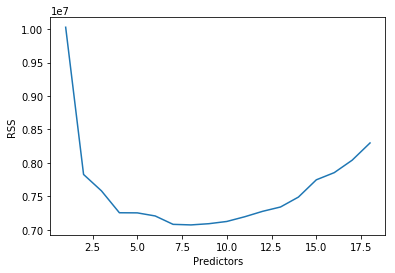

In [7]:
plt.figure()
plt.plot(validationModels["RSS"])
plt.xlabel('Predictors')
plt.ylabel('RSS')
plt.show()

bla bla

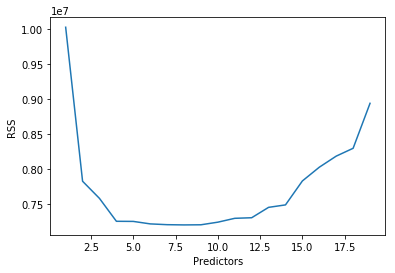

In [8]:
plt.figure()
plt.plot(validationModelsForward["RSS"])
plt.xlabel('Predictors')
plt.ylabel('RSS')
plt.show()

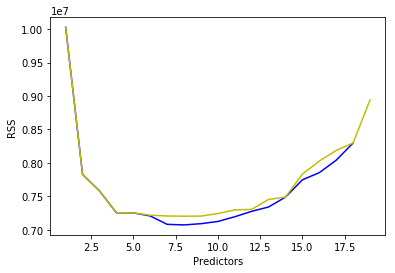

In [16]:
plt.figure()
plt.plot(validationModels["RSS"],'b')
plt.plot(validationModelsForward["RSS"],'y')
plt.xlabel('Predictors')
plt.ylabel('RSS')
plt.show()

Now we've tried to validate best subset and forward stepwise selection, let's continue with Cross-Validation

In [9]:
k = 10
np.random.seed(seed = 21)
train_index = np.random.choice(k, size = len(y), replace = True)
crossValidationErrors = pd.DataFrame(columns=range(1,k+1), index=range(1,len(X.columns) + 1))

bla bla

In [10]:
crossValidationModels = pd.DataFrame(columns=["RSS", "Model"])
for j in range(1,k+1):
    predictors_list = []
    for i in range(1,len(X.columns)+1):
        crossValidationModels.loc[i] = validateForwardStepwiseSelection(y[train_index!= (j-1)], X[train_index != (j-1)], y[train_index == (j-1)], X[train_index == (j-1)], predictors_list)
        
        crossValidationErrors[j][i] = crossValidationModels.loc[i]["RSS"]
        predictors_list = crossValidationModels.loc[i]["Model"].model.exog_names

C:\Users\au479931\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


bla bla

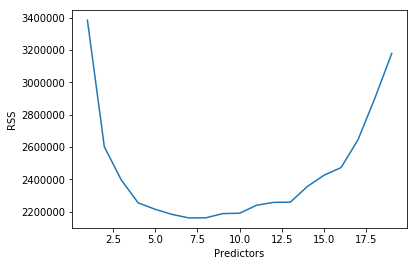

In [11]:
crossValidationMeanErrors = crossValidationErrors.mean(axis = 1)
plt.figure()
plt.plot(crossValidationMeanErrors)
plt.xlabel('Predictors')
plt.ylabel('RSS')
plt.show()

bla bla

In [12]:
print(crossValidationModels.loc[5, "Model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     155.0
Date:                Fri, 04 May 2018   Prob (F-statistic):           1.40e-71
Time:                        17:52:26   Log-Likelihood:                -1704.1
No. Observations:                 235   AIC:                             3418.
Df Residuals:                     230   BIC:                             3435.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Walks          6.3470      0.934      6.795      0.0